# Exploratory Data Analysis and Model Plots



# Import libraries

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics


import warnings
warnings.filterwarnings('ignore')

# Global Variables

In [2]:
# # Set custom color palette
# from https://coolors.co/

colors = ['#2c1258','#b86a44'#, '#671f47', '#a22e54',  '#dabc66'
            ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

In [5]:
# global variables

# for reproducibility sake
RSEED = 42

# data path to load last saved update version of the processed fraud data for eda
data_path = 'data/df_processed_eda.csv'

# this contains all original variables and extra one feauture
fraud_data_v1 = pd.read_csv(data_path)
fraud_data_v1

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0.0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0.0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0.0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0.0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0.0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476686,60,train_Client_99998,11,101,1993-12-22,0,2005-08-19,10,1253571,0.0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476687,60,train_Client_99998,11,101,1993-12-22,0,2005-12-19,10,1253571,0.0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476688,60,train_Client_99999,11,101,1986-02-18,0,1996-09-25,11,560948,0.0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476689,60,train_Client_99999,11,101,1986-02-18,0,1996-05-28,11,560948,0.0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [ ]:
# data info

fraud_data_v1.info(show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476691 entries, 0 to 4476690
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   disrict               4476691 non-null  int64  
 1   client_id             4476691 non-null  object 
 2   client_catg           4476691 non-null  int64  
 3   region                4476691 non-null  int64  
 4   creation_date         4476691 non-null  object 
 5   target                4476691 non-null  int64  
 6   invoice_date          4476691 non-null  object 
 7   tarif_type            4476691 non-null  int64  
 8   counter_number        4476691 non-null  int64  
 9   counter_statue        4476691 non-null  float64
 10  counter_code          4476691 non-null  int64  
 11  reading_remarque      4476691 non-null  int64  
 12  counter_coefficient   4476691 non-null  int64  
 13  consommation_level_1  4476691 non-null  int64  
 14  consommation_level_2  4476691 non-

In [6]:
# descriptive summary


fraud_data_v1.describe().T.style \
        .format("{:.2f}")





,count,mean,std,min,25%,50%,75%,max
disrict,4476691.00,63.48,3.27,60.00,62.00,62.00,63.00,69.00
client_catg,4476691.00,11.94,6.02,11.00,11.00,11.00,11.00,51.00
region,4476691.00,210.36,103.58,101.00,103.00,301.00,309.00,399.00
target,4476691.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
tarif_type,4476691.00,20.13,13.47,8.00,11.00,11.00,40.00,45.00
counter_number,4476691.00,123060293382.90,1657277950813.88,0.00,121110.00,494561.00,1115161.00,27981145458733.00
counter_statue,4476691.00,0.04,0.37,0.00,0.00,0.00,0.00,5.00
counter_code,4476691.00,172.49,133.89,5.00,5.00,203.00,207.00,600.00
reading_remarque,4476691.00,7.32,1.36,6.00,6.00,8.00,9.00,9.00
counter_coefficient,4476691.00,1.00,0.31,0.00,1.00,1.00,1.00,50.00


In [7]:
# descriptive summary: all columns


fraud_data_v1.describe(include='all').T




,count,unique,top,freq,mean,std,min,25%,50%,75%,max
disrict,4476691.0,NaN,NaN,NaN,63.482486,3.273413,60.0,62.0,62.0,63.0,69.0
client_id,4476691,135491,train_Client_116878,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
client_catg,4476691.0,NaN,NaN,NaN,11.943797,6.022405,11.0,11.0,11.0,11.0,51.0
region,4476691.0,NaN,NaN,NaN,210.358089,103.582851,101.0,103.0,301.0,309.0,399.0
creation_date,4476691,8088,1997-11-20,10758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,4476691.0,NaN,NaN,NaN,0.078877,0.269547,0.0,0.0,0.0,0.0,1.0
invoice_date,4476691,8275,2019-03-09,4127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tarif_type,4476691.0,NaN,NaN,NaN,20.12812,13.472599,8.0,11.0,11.0,40.0,45.0
counter_number,4476691.0,NaN,NaN,NaN,123060293382.897247,1657277950813.876221,0.0,121110.0,494561.0,1115161.0,27981145458733.0
counter_statue,4476691.0,NaN,NaN,NaN,0.042203,0.374506,0.0,0.0,0.0,0.0,5.0


---

# Brief Exploration / Hypothesis based on processed data

* Stakeholder : STEG (Tunisian Company of Electricity and Gas)
* Business objective : To use client's billing history to predict which clients are probably fraudulently manipulating their energy (electricity and gas) meters
* open questions :
    - What is the fraud vs no fraud count?
    - What does the recorded reading remark  tell us about fraudulent activities? 
    - What does the consumption levels tell about the clients who commit fraud vs no fraud.
    - What is the amount of fraudulent activities were for electricity vs gas? 
    - What does the index change per month  tell us about fraudulent activities? 
        - This was based on the sum of the consumption (FR: consummation) levels and the number of months_year
    - Does the number of years a client has been a member give insight on if a client is fraudulent or not?
    - What does the recorded quantity counters tell us about fraudulent activities? 
    - What does the tarrif_type counters tell us about fraudulent activities? 
        - this was strongly correlated in a negative direction to the counter coefficient

* hypothesis statements :
    - very low consumption levels are an indicator of fraud.
    - client_category is a predictor for fraud.
    - geographical location (district, region) is an indicator for fraud.
    - not having any consummation at level 2 and higher is an indicator for fraud.
    - certain reading_remarques are an indicator of fraud.

* possible future stakeholders / use cases: 
    - other Gas or Electricity Companies
    - Law enforcement agencies
    - state authorities for utilities

* possible EDA / plots for slides
    - aggregating some data to gain insight (groupbys bins etc)
    - basic plots to investigate the data visually
        - countplots
        - histograms
        - bar charts?
    - What is the amount of fraudulent activities were for electricity vs gas? 
    

In [8]:

# list of all features currently in this version of processed data

columns = fraud_data_v1.iloc[:, ].columns
columns




Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [9]:
# storing features for plot in list

features_0 = ['disrict', 'client_catg', 'region', 
       'tarif_type', 'counter_number', 
       'counter_code', 'reading_remarque',
       'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 
       'old_index', 'new_index', 'months_number']




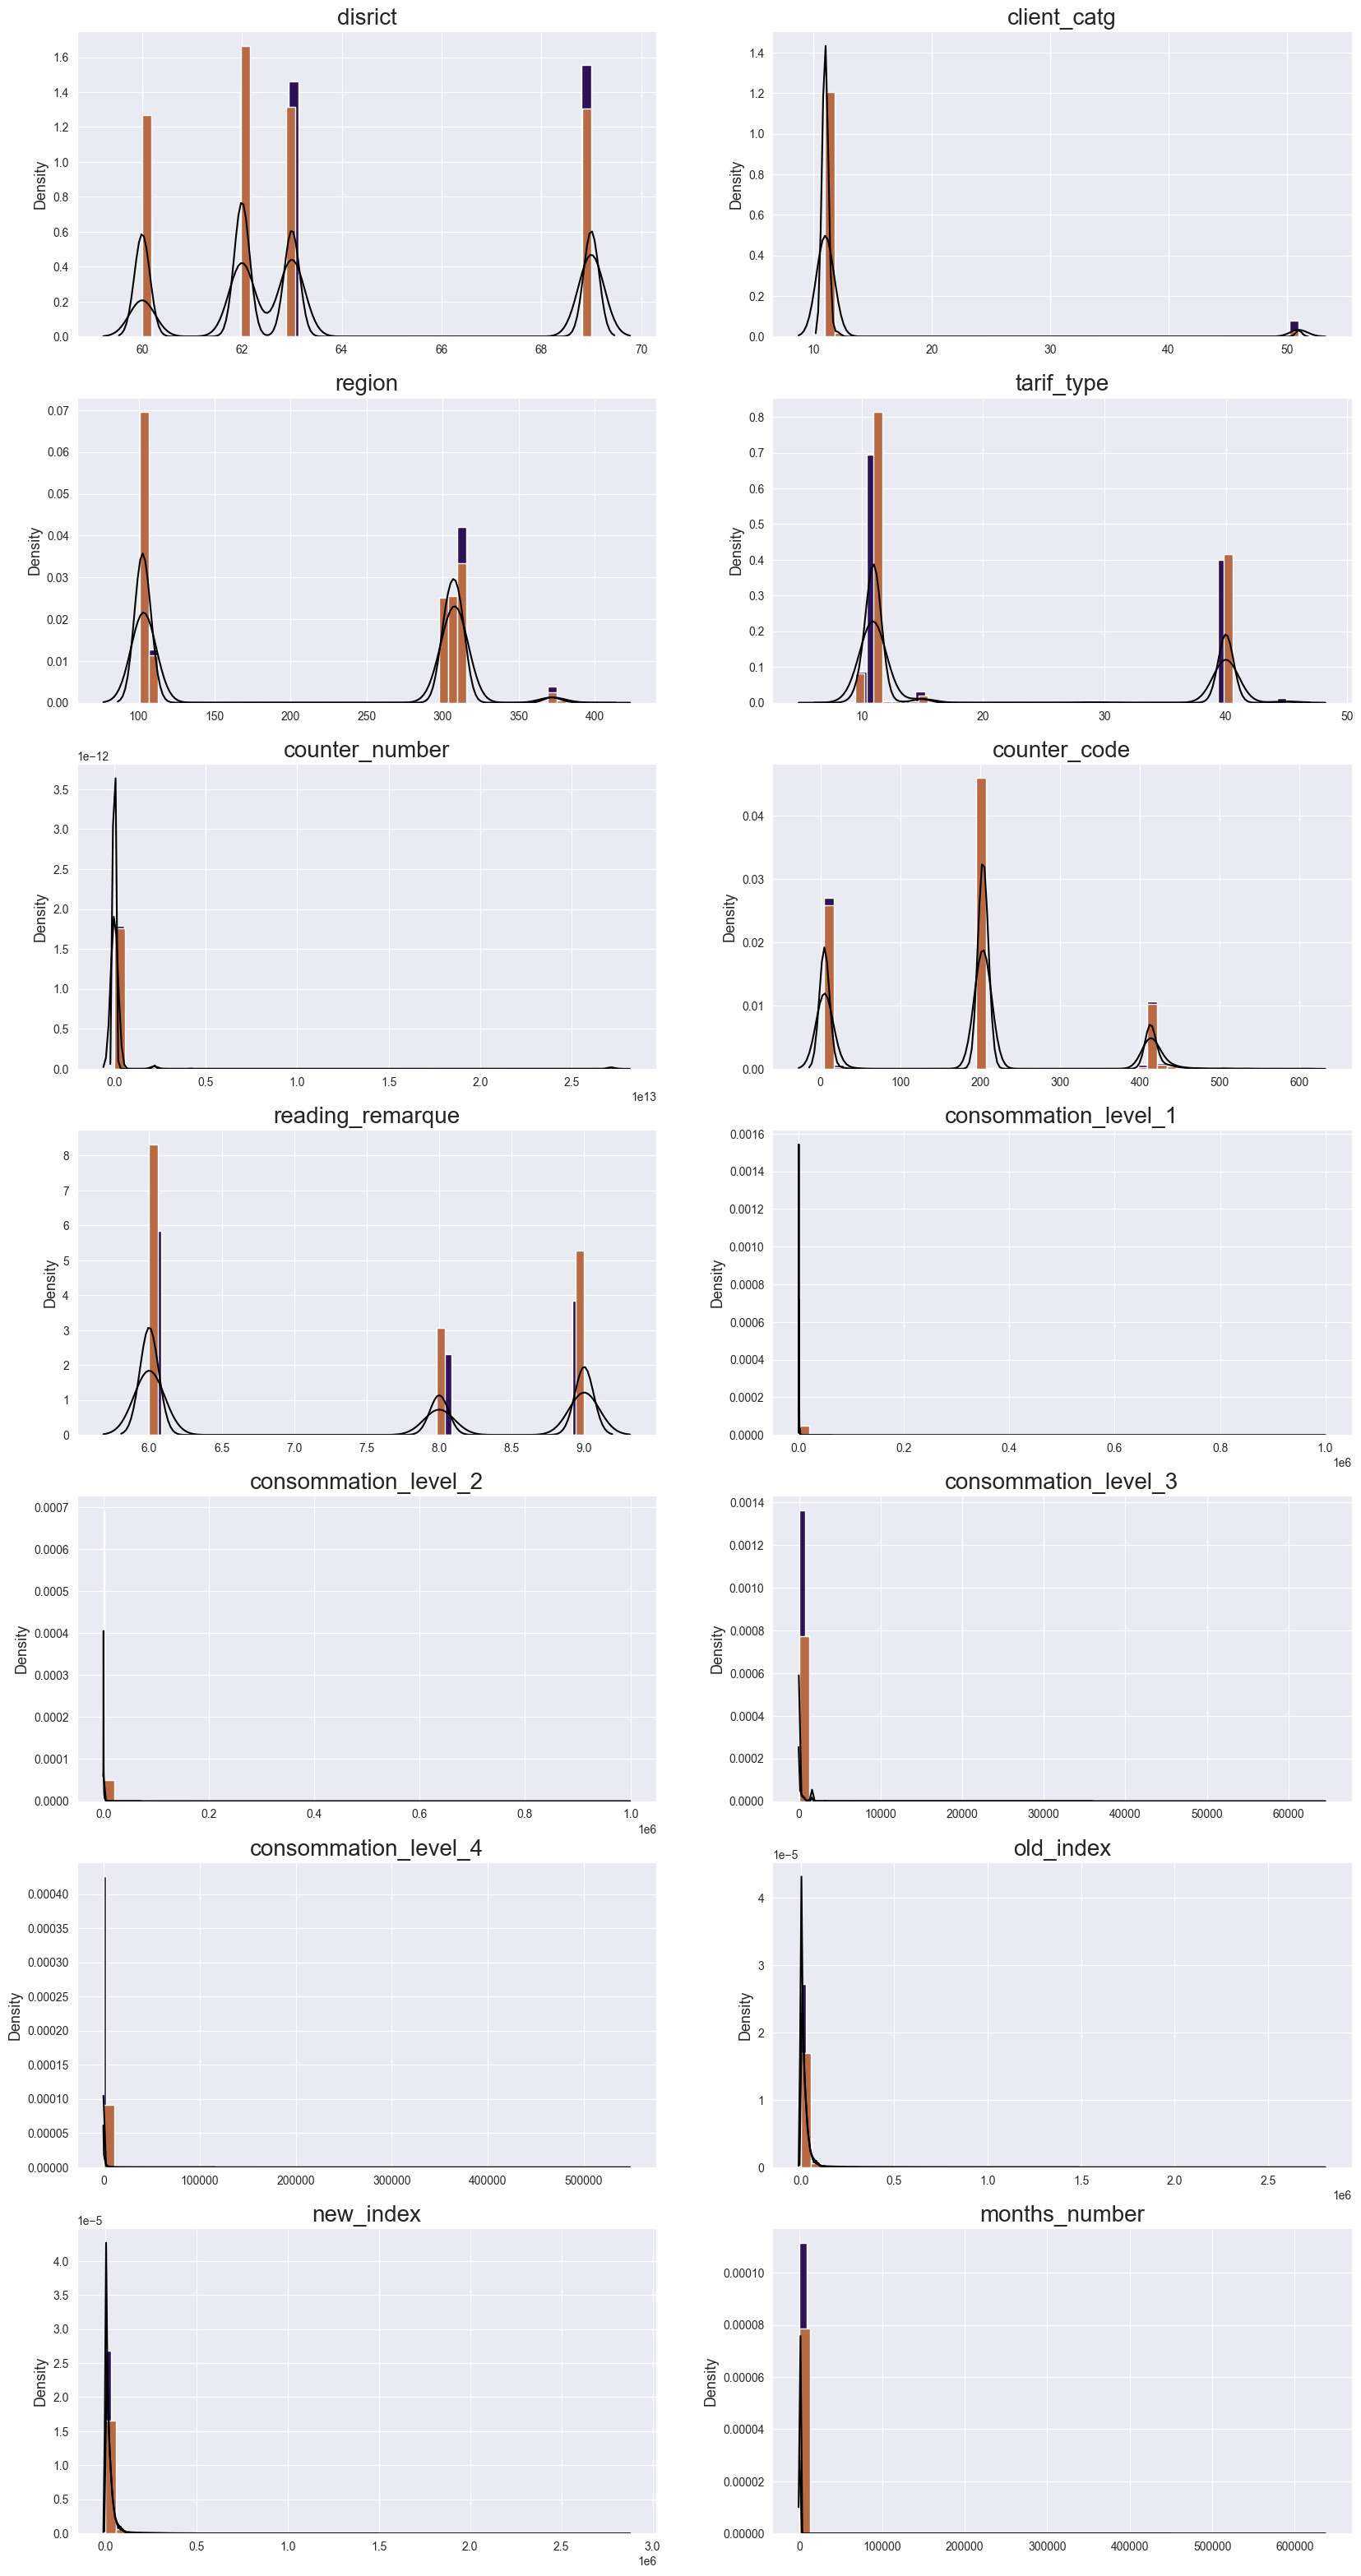

In [11]:
#plotting the distribution of the data for the features

import matplotlib.gridspec as gridspec


fraud = fraud_data_v1['target'] == 1
not_fraud = fraud_data_v1['target'] == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(fraud_data_v1[features_0]):
    ax = plt.subplot(grid[n])
    sns.distplot(fraud_data_v1[col][fraud], color=customPalette, kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(fraud_data_v1[col][not_fraud],color=customPalette, kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()




# What is the fraud vs no fraud count?



In [14]:
# number of unique classes in our target data with it's value counts


target_counts = fraud_data_v1['target'].value_counts()
no_fraud_percentage = round((target_counts[0]/len(fraud_data_v1))*100, 2)
fraud_percentage = round((target_counts[1]/len(fraud_data_v1))*100, 2)

print(f''' Count of no fraud class : {target_counts[0]}''')
print(f''' Percentage of no fraud class : {no_fraud_percentage} %''')

print('_______'*10)

print(f''' Count of fraud class : {target_counts[1]} ''')
print(f''' Percentage of fraud class : {fraud_percentage} %''')





 Count of no fraud class : 4123582
 Percentage of no fraud class : 92.11 %
______________________________________________________________________
 Count of fraud class : 353109 
 Percentage of fraud class : 7.89 %


The amount of fraudulent cases recorded in the data is $353,109$ while the amount of no fraudulent cases from a total of $4,476,690$ observations is recorded as  $4,123,582$.

<br>

Only $7.89$ % of the data were observed to be fraudulent from the financial records related to the client.



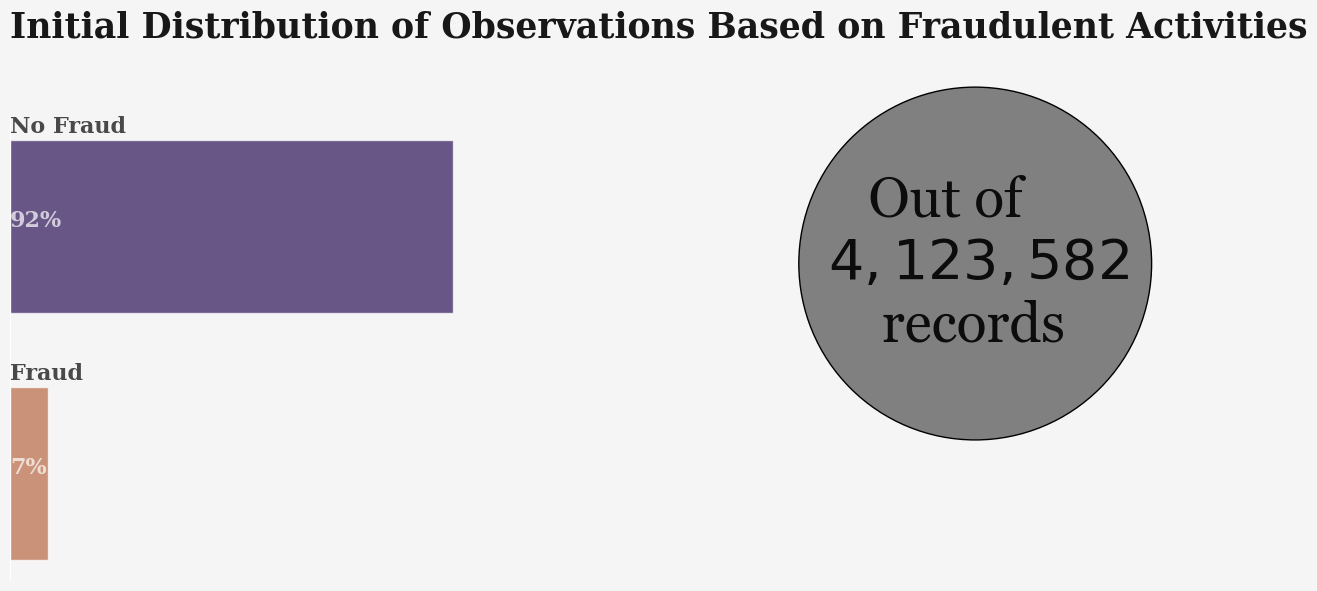

In [22]:
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

fig, ax=plt.subplots(figsize=(6,6))

ax.barh([1], target_counts[0], height=0.7, color='#2c1258', alpha=0.7)
plt.text(-50, 1.38, 'No Fraud', {'font': 'Serif','weight':'bold',
                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50, 1, f'{int(no_fraud_percentage)}%', {'font': 'Serif','weight':'bold',
                                    'size': '16','style':'normal', 'color':'white'}, alpha = 0.7)



ax.barh([0], target_counts[1], height=0.7, color='#b86a44', alpha=0.7)
plt.text(-50, 0.38, 'Fraud', {'font': 'Serif','weight':'bold','size': '16',
                                        'style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50, 0, f'{int(fraud_percentage)}%', {'font': 'Serif','weight':'bold',
                                        'size': '16','style':'normal', 'color':'white'}, alpha = 0.7)


plt.text(-50, 1.77, 'Distribution of Observations Based on Fraudulent Activities' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)


plt.text(7500000, 0.85, "    Out of    \n $4,123,582$ \n     records", 
            size= 40, ha="left", color = 'black', va="center",  
            bbox=dict(boxstyle="circle", facecolor='grey', edgecolor='black'), 
            fontfamily='Georgia', alpha = 0.9)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




In [ ]:
#fraud_data_v1.query('target == 0')['target'].value_counts()

fraud_values = fraud_data_v1.query('target == 1')['target']
no_fraud_values = fraud_data_v1.query('target == 0')['target']


In [ ]:
# # plot
# fig, ax = plt.subplots(figsize=(6, 4))
# colors = {'No Fraud': 0, 'Fraud': 1}

# sns.scatterplot(data=fraud_data_v1, x="consommation_level_1", y="consommation_level_2", hue="target")
# sns.scatterplot(data=fraud_data_v1, x="tarif_type", y="consommation_level_1", hue="target")

# ax.set(xlabel='RR', ylabel='cd')
# fig.suptitle('rrcd')
# plt.show()

# New processed data (fraud_data_v2) and extra feature engineering 

* average consumption price = 
* consumption_price_bins? 
* index_change
* index_ change per month
* time_range_bins 




In [ ]:
# latest version of processed data


fraud_data_v2 = pd.read_csv('data/df_processed_eda_2.csv')

fraud_data_v2.head()


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0.0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0.0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0.0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0.0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0.0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
# info

fraud_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476691 entries, 0 to 4476690
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                int64  
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        float64
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(16), object(4)
memory usage: 717.2+ MB


In [ ]:
# turn columns invoice date and creation date to datetime

fraud_data_v2['invoice_date'] = pd.to_datetime(fraud_data_v2['invoice_date'], format='%Y-%m-%d')
#fraud_data_v2['creation_date'] = pd.to_datetime(fraud_data_v2['creation_date'], format='%d/%m/%Y')
fraud_data_v2['creation_date'] = pd.to_datetime(fraud_data_v2['creation_date'], format='%Y-%m-%d')


# month and year from date columns

fraud_data_v2['creation_month'] = fraud_data_v2['creation_date'].dt.month.astype(int)
fraud_data_v2['creation_year'] = fraud_data_v2['creation_date'].dt.year.astype(int)
fraud_data_v2['invoice_month'] = fraud_data_v2['invoice_date'].dt.month.astype(int)
fraud_data_v2['invoice_year'] = fraud_data_v2['invoice_date'].dt.year.astype(int)





In [ ]:
# 

fraud_data_v2['member_years'] = fraud_data_v2['invoice_date'].dt.year.astype(int) - fraud_data_v2['creation_date'].dt.year.astype(int)

fraud_data_v2['index_change']= fraud_data_v2['new_index'] - fraud_data_v2['old_index']





In [ ]:
# info & head

fraud_data_v2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476691 entries, 0 to 4476690
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               int64         
 1   client_id             object        
 2   client_catg           int64         
 3   region                int64         
 4   creation_date         datetime64[ns]
 5   target                int64         
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        float64       
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index             int64         
 19  

In [ ]:
fraud_data_v3 = pd.read_csv('data/df_processed_dmy.csv')

fraud_data_v3.head()

,target,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,...,tarif_type_45,counter_statue_1.0,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_GAZ
0,0,20,20.500000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,19,346.000000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,21,30.750000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,21,25.500000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,22,47.666667,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# average price per Kilowatthours
# Elec (household kWh) : 0.210 tunisian dinar
# 


fraud_data_v2['price_change'] = fraud_data_v2['new_index'] * fraud_data_v2['old_index']






In [ ]:
# only 3 columns taken : member years, index_change_per_month, quantity_counters


fraud_data_v31 = fraud_data_v3[['member_years', 'index_change_month', 'quantity_counters']]



In [ ]:
# merge new features with old features I need



fraud_data_v21 = pd.DataFrame(fraud_data_v2).drop('metric_params', axis=1)
fraud_data_v22 = pd.DataFrame(knn_cv_gs_2.cv_results_['params']).drop('metric_params', axis=1)


knn_cv_gspo = pd.DataFrame(knn_cv_gs_2.cv_results_)[['mean_train_score', 'mean_test_score',  'rank_test_score']]


knn_cv_results_2 = pd.concat([knn_cv_gsp1, knn_cv_gspo], axis=1)

knn_cv_results_2 

fraud_data_version_3 = pd.read_csv('data/df_processed_dmy.csv')

fraud_data_version_3.head()


In [ ]:
# scatter plot of index and consumation level 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=fraud_data_v1[fraud_data_v1['target'] == 0]['Time'], y=data[data['Class'] == 0]['Amount'], color="dodgerblue", s=50, edgecolor='black')
plt.title("Month - Consumption level vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()




In [ ]:
# save curated dataset for later

## df_processed.to_csv('data/df_processed_eda_2.csv', index=False, chunksize=len(df_processed)//16)




# What is the distribution of fraud vs no fraud for the counter type (elec vs gas)?

--- 


In [ ]:
# grouping by clients

counter_type_per_client = fraud_data_v1.groupby('client_id')[['counter_type']].value_counts()

counter_type_per_client




client_id           counter_type
train_Client_0      ELEC            35
train_Client_1      ELEC            37
train_Client_10     ELEC            18
train_Client_100    ELEC            20
train_Client_1000   ELEC            14
                                    ..
train_Client_99996  ELEC            20
train_Client_99997  ELEC            22
                    GAZ             14
train_Client_99998  ELEC             2
train_Client_99999  ELEC             3
Name: count, Length: 196865, dtype: int64


# What does the consumption levels tell about the clients who commit fraud vs no fraud.


- What does the index change per month  tell us about fraudulent activities? 
        - This was based on the sum of the consumption (FR: consummation) levels and the number of months_year





![Check_for_correlations](images/consumption_tunisia_electricity.png) <br>


[Source: Global Economy Consumption](https://www.theglobaleconomy.com/Tunisia/electricity_consumption/)





In [ ]:

# plotting for consumation levels

features_1 = [
        'consommation_level_1', 'consommation_level_2',
        'consommation_level_3', 'consommation_level_4', 
        'old_index', 'new_index']



fraud = fraud_data_v1['target'] == 1
not_fraud = fraud_data_v1['target'] == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(fraud_data_v1[features_1]):
    ax = plt.subplot(grid[n])
    sns.distplot(fraud_data_v1[col][fraud], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(fraud_data_v1[col][not_fraud],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()






In [ ]:
# counter per client feature
quantity_counter = df_processed.groupby('client_id')['counter_number'].count().reset_index()
quantity_counter.rename(columns={'counter_number':'quantity_counters'}, inplace=True)
quantity_counter.head()

# ML Models and Baseline Characteristics

### Baseline Model: Predicting all to be non-fraud

  * index change wit respect to consuption per month <= 15% is fraud

predicting fraud for clients with consummation/month in the lowest 15 % (change_index)

In [12]:
# loading ensemble test result

df_test_ensemble = pd.read_csv('data/df_test_ensemble.csv')
df_test_ensemble


,member_years,index_change_month,quantity_counters,client_catg_11,client_catg_12,client_catg_51,region_101,region_103,region_104,region_105,...,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_ELEC,counter_type_GAZ,target,fraud_pred,no_fraud_proba,fraud_proba,pred_corr
0,11,17.000,58,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.499381,0.500619,False
1,5,20.375,68,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0.496718,0.503282,False
2,4,0.000,48,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0.498331,0.501669,False
3,28,415.500,62,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0.499155,0.500845,False
4,20,5.750,60,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0.495342,0.504658,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119168,11,53.500,60,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.499954,0.500046,False
1119169,5,457.250,66,1,0,0,0,1,0,0,...,0,0,1,1,0,1,1,0.494474,0.505526,True
1119170,11,473.625,37,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0.501071,0.498929,True
1119171,14,15.500,69,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0.502817,0.497183,True


In [25]:
# loading logistic reg test result

df_test_logreg = pd.read_csv('data/df_test_lrpreds.csv')
df_test_logreg = df_test_logreg.rename({'pred_corr' : 'pred_corr_lr'}, axis=1)
df_test_logreg


,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,reading_remarque_8.1,reading_remarque_9.1,counter_type_GAZ.1,target,fraud_pred_lr,no_fraud_prob_lrmm,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0,0,0.914634,0.085366,0.763572,0.236428,True
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0.864962,0.135038,0.559889,0.440111,True
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0.867971,0.132029,0.862402,0.137598,True
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.945326,0.054674,0.667667,0.332333,True
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0,0,0.824911,0.175089,0.418888,0.581112,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119168,0.261905,0.784433,0.134703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0.923822,0.076178,0.763758,0.236242,True
1119169,0.119048,0.784750,0.148402,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0.866579,0.133421,0.682668,0.317332,False
1119170,0.261905,0.784763,0.082192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0,0.961805,0.038195,0.982123,0.017877,True
1119171,0.333333,0.784403,0.155251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0,0,0.953843,0.046157,0.693293,0.306707,True


In [26]:
# etc rename

df_test_ee = df_test_ensemble[['counter_type_ELEC',	'counter_type_GAZ',	'fraud_pred','no_fraud_proba','fraud_proba','pred_corr']]

df_test_ee = df_test_ee.rename({'pred_corr' : 'pred_corr_ee', 'fraud_pred' : 'fraud_pred_ee', 'no_fraud_proba' : 'no_fraud_proba_ee', 'fraud_proba' : 'fraud_proba_ee'}, axis=1)
df_test_ee


,counter_type_ELEC,counter_type_GAZ,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
0,0,1,1,0.499381,0.500619,False
1,0,1,1,0.496718,0.503282,False
2,0,1,1,0.498331,0.501669,False
3,1,0,1,0.499155,0.500845,False
4,0,1,1,0.495342,0.504658,False
...,...,...,...,...,...,...
1119168,0,1,1,0.499954,0.500046,False
1119169,1,0,1,0.494474,0.505526,True
1119170,1,0,0,0.501071,0.498929,True
1119171,0,1,0,0.502817,0.497183,True


In [27]:
# merger

df_test_ml_models = pd.concat([df_test_logreg, df_test_ee], axis=1)
df_test_ml_models.head()





,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.085366,0.763572,0.236428,True,0,1,1,0.499381,0.500619,False
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135038,0.559889,0.440111,True,0,1,1,0.496718,0.503282,False
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.132029,0.862402,0.137598,True,0,1,1,0.498331,0.501669,False
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054674,0.667667,0.332333,True,1,0,1,0.499155,0.500845,False
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.175089,0.418888,0.581112,True,0,1,1,0.495342,0.504658,False


In [67]:


### saving for further analytics

# df_test_ml_models.to_csv('data/df_test_ml_models.csv', index=False, chunksize=len(df_test_ml_models)//8)



In [3]:


df_test_ml_models = pd.read_csv('data/df_test_ml_models.csv')
df_test_ml_models


,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ.2,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.085366,0.763572,0.236428,True,0,1,1,0.499381,0.500619,False
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135038,0.559889,0.440111,True,0,1,1,0.496718,0.503282,False
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.132029,0.862402,0.137598,True,0,1,1,0.498331,0.501669,False
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054674,0.667667,0.332333,True,1,0,1,0.499155,0.500845,False
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.175089,0.418888,0.581112,True,0,1,1,0.495342,0.504658,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119168,0.261905,0.784433,0.134703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076178,0.763758,0.236242,True,0,1,1,0.499954,0.500046,False
1119169,0.119048,0.784750,0.148402,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.133421,0.682668,0.317332,False,1,0,1,0.494474,0.505526,True
1119170,0.261905,0.784763,0.082192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038195,0.982123,0.017877,True,1,0,0,0.501071,0.498929,True
1119171,0.333333,0.784403,0.155251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046157,0.693293,0.306707,True,0,1,0,0.502817,0.497183,True


In [4]:
# quantile


quantile_idx = df_test_ml_models[['index_change_month']].quantile(q=0.15)[0]
quantile_idx




0.7843951981599545

In [5]:
# Defining baseline model that predicts no one commits fraud

def baseline_model_idx(df, quantile_idx):
    y_pred = [1 if x <= quantile_idx else 0 for x in df['index_change_month']]
    return y_pred

    

In [6]:

# test data

X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")


# Compute predictions with baseline model for test set
y_baseline_idx_test = baseline_model_idx(df_test_ml_models, quantile_idx)

print('____________________')

# confusion matrix of actual y and predicted y
print ('Confusion Matrix :')
conf_matrix = confusion_matrix(y_test, y_baseline_idx_test)
print(conf_matrix)
print('____________________')

# ROC AUC Score score of actual y and predicted y
print ('ROC AUC Score :', round(roc_auc_score(y_test, y_baseline_idx_test), 4))
print('____________________')

# FBeta Score score of actual y and predicted y
print ('FBeta Score, Beta = 2 :', round(fbeta_score(y_test, y_baseline_idx_test, beta=2), 4))
print('____________________')

# accuracy score of confusion matrix
print ('Accuracy Score :', round(accuracy_score(y_test, y_baseline_idx_test), 4))
print('____________________')

# classification report of confusion matrix
print ('Report : ')
print (classification_report(y_test, y_baseline_idx_test) )
print('____________________')




____________________
Confusion Matrix :
[[875422 155474]
 [ 75766  12511]]
____________________
ROC AUC Score : 0.4955
____________________
FBeta Score, Beta = 2 : 0.12
____________________
Accuracy Score : 0.7934
____________________
Report : 
              precision    recall  f1-score   support

           0       0.92      0.85      0.88   1030896
           1       0.07      0.14      0.10     88277

    accuracy                           0.79   1119173
   macro avg       0.50      0.50      0.49   1119173
weighted avg       0.85      0.79      0.82   1119173

____________________


In [ ]:
''' 

Baseline Model
____________________
Confusion Matrix :
[[910059 120837]
 [ 78060  10217]]
____________________
ROC AUC Score : 0.4993
____________________
FBeta Score, Beta = 2 : 0.1055
____________________
Accuracy Score : 0.8223
____________________
Report : 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90   1030896
           1       0.08      0.12      0.09     88277

    accuracy                           0.82   1119173
   macro avg       0.50      0.50      0.50   1119173
weighted avg       0.85      0.82      0.84   1119173

____________________



'''

In [ ]:
'''

Easy Ensemble
____________________
Confusion Matrix :
[[625964 404932]
 [ 32226  56051]]
____________________
Accuracy Score : 0.6093919349376727
____________________
Report : 
              precision    recall  f1-score   support

           0       0.95      0.61      0.74   1030896
           1       0.12      0.63      0.20     88277

    accuracy                           0.61   1119173
   macro avg       0.54      0.62      0.47   1119173
weighted avg       0.89      0.61      0.70   1119173

____________________

'''

In [ ]:


'''

Logistic Regression
____________________
Confusion Matrix :
[[785650 245246]
 [ 56546  31731]]
____________________
ROC AUC Score : 0.5608
____________________
FBeta Score, Beta = 2 : 0.2518
____________________
Accuracy Score : 0.7303
____________________
Report : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84   1030896
           1       0.11      0.36      0.17     88277

    accuracy                           0.73   1119173
   macro avg       0.52      0.56      0.51   1119173
weighted avg       0.87      0.73      0.79   1119173

____________________



'''

In [7]:
# baseline model


# number of unique classes in our target data with it's value counts


base_target_counts = df_test_ml_models['target'].value_counts()
bno_fraud_percentage = round((base_target_counts[0]/len(df_test_ml_models))*100, 2)
bfraud_percentage = round((base_target_counts[1]/len(df_test_ml_models))*100, 2)

print(f''' Count of no fraud class : {base_target_counts[0]}''')
print(f''' Percentage of no fraud class : {bno_fraud_percentage} %''')

print('_______'*10)

print(f''' Count of fraud class : {base_target_counts[1]} ''')
print(f''' Percentage of fraud class : {bfraud_percentage} %''')





 Count of no fraud class : 1030896
 Percentage of no fraud class : 92.11 %
______________________________________________________________________
 Count of fraud class : 88277 
 Percentage of fraud class : 7.89 %


In [8]:

base_target_counts = df_test_ml_models['target'].value_counts()



In [9]:
base_group =  df_test_ml_models.groupby('target')['target'].value_counts()
base_group.head()

bno_fraud_percent = round((base_group[0]/len(df_test_ml_models))*100, 1)
bfraud_percent = round((base_group[1]/len(df_test_ml_models))*100, 1)
print(f''' Count of no fraud class : {base_group[0]}''')
print(f''' Percentage of no fraud class : {bno_fraud_percent} %''')

print('_______'*10)

print(f''' Count of fraud class : {base_group[1]} ''')
print(f''' Percentage of fraud class : {bfraud_percent} %''')

 Count of no fraud class : 1030896
 Percentage of no fraud class : 92.1 %
______________________________________________________________________
 Count of fraud class : 88277 
 Percentage of fraud class : 7.9 %


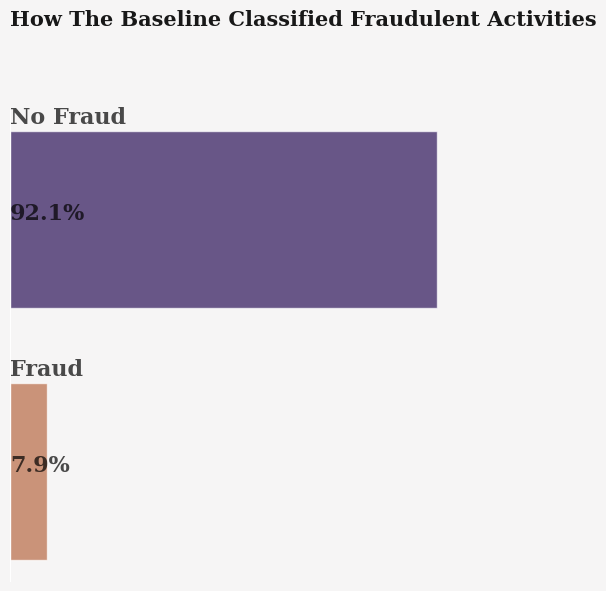

In [204]:

customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

fig, ax=plt.subplots(figsize=(6,6))

base_group =  df_test_ml_models.groupby('target')['target'].value_counts()

#sns.countplot(data=base_group, x='counter_type_GAZ', hue='target', color=customPalette)
ax.barh([1], base_group[0], height=0.7, color='#2c1258', alpha=0.7)

plt.text(-50, 1.38, 'No Fraud', {'font': 'Serif','weight':'bold',
                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50, 1, f'{bno_fraud_percent}%', {'font': 'Serif','weight':'bold',
                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)



ax.barh([0], base_group[1], height=0.7, color='#b86a44', alpha=0.7)
plt.text(-50, 0.38, 'Fraud', {'font': 'Serif','weight':'bold','size': '16',
                                        'style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(50, 0, f'{bfraud_percent}%', {'font': 'Serif','weight':'bold',
                                        'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50, 1.77, 'How The Baseline Classified Fraudulent Activities' ,{'font': 'Serif', 'size': '15','weight':'bold', 'color':'black'}, alpha = 0.9)


# plt.text(1850370.55, 0.85, " 88,277 \n  Fraudulent Activities  \n Detected!", 
#             size= 30, ha="left", color = 'black', va="center",  
#             bbox=dict(boxstyle="circle", facecolor='#b86a44', edgecolor='black'), 
#             fontfamily='Georgia', alpha = 0.9)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



ax.set_xlabel('Count (in Million)', fontsize=20, color='#2c1258');



In [74]:
# ml model ensemble


# number of unique classes in our target data with it's value counts


eens_target_counts = df_test_ml_models['fraud_pred_ee'].value_counts()
eno_fraud_percentage = round((eens_target_counts[0]/len(df_test_ml_models))*100, 2)
efraud_percentage = round((eens_target_counts[1]/len(df_test_ml_models))*100, 2)

print(f''' Count of no fraud class : {eens_target_counts[0]}''')
print(f''' Percentage of no fraud class : {eno_fraud_percentage} %''')

print('_______'*10)

print(f''' Count of fraud class : {eens_target_counts[1]} ''')
print(f''' Percentage of fraud class : {efraud_percentage} %''')






 Count of no fraud class : 658190
 Percentage of no fraud class : 58.81 %
______________________________________________________________________
 Count of fraud class : 460983 
 Percentage of fraud class : 41.19 %


In [133]:

#eens_target_counts = df_test_ml_models.groupby('target')['fraud_pred_ee'].value_counts()


eens_target_counts = df_test_ml_models['fraud_pred_ee'].value_counts()
eno_fraud_percentage = round((eens_target_counts[0]/len(df_test_ml_models))*100, 2)
efraud_percentage = round((eens_target_counts[1]/len(df_test_ml_models))*100, 2)

print(f''' Count of no fraud class : {eens_target_counts[0]}''')
print(f''' Percentage of no fraud class : {eno_fraud_percentage} %''')

print('_______'*10)

print(f''' Count of fraud class : {eens_target_counts[1]} ''')
print(f''' Percentage of fraud class : {efraud_percentage} %''')

 Count of no fraud class : 658190
 Percentage of no fraud class : 58.81 %
______________________________________________________________________
 Count of fraud class : 460983 
 Percentage of fraud class : 41.19 %


In [159]:
eens_group =  df_test_ml_models.groupby('target')['fraud_pred_ee'].value_counts()
eens_group.head()

eno_fraud_percent = round((eens_group[0]/len(df_test_ml_models))*100, 1)
efraud_percent = round((eens_group[1]/len(df_test_ml_models))*100, 1)

print(f''' Count of no fraud class based on fraud predictions: {eens_group[0]}''')
#print(f''' Percentage of no fraud class : {eno_fraud_percent} %''')

print('_______'*10)


print(f''' Count of fraud class : {eens_group[1]} ''')
#print(f''' Percentage of fraud class : {efraud_percent} %''')

 Count of no fraud class based on fraud predictions: fraud_pred_ee
0    625964
1    404932
Name: count, dtype: int64
______________________________________________________________________
 Count of fraud class : fraud_pred_ee
1    56051
0    32226
Name: count, dtype: int64 


In [163]:

eens_group =  df_test_ml_models.groupby('target')['fraud_pred_ee'].value_counts()
eens_group


target  fraud_pred_ee
0       0                625964
        1                404932
1       1                 56051
        0                 32226
Name: count, dtype: int64

In [168]:
eens_groups =  df_test_ml_models.groupby('target')[['target', 'fraud_pred_ee']].value_counts()
eens_groups.head()

target  fraud_pred_ee
0       0                625964
        1                404932
1       1                 56051
        0                 32226
Name: count, dtype: int64

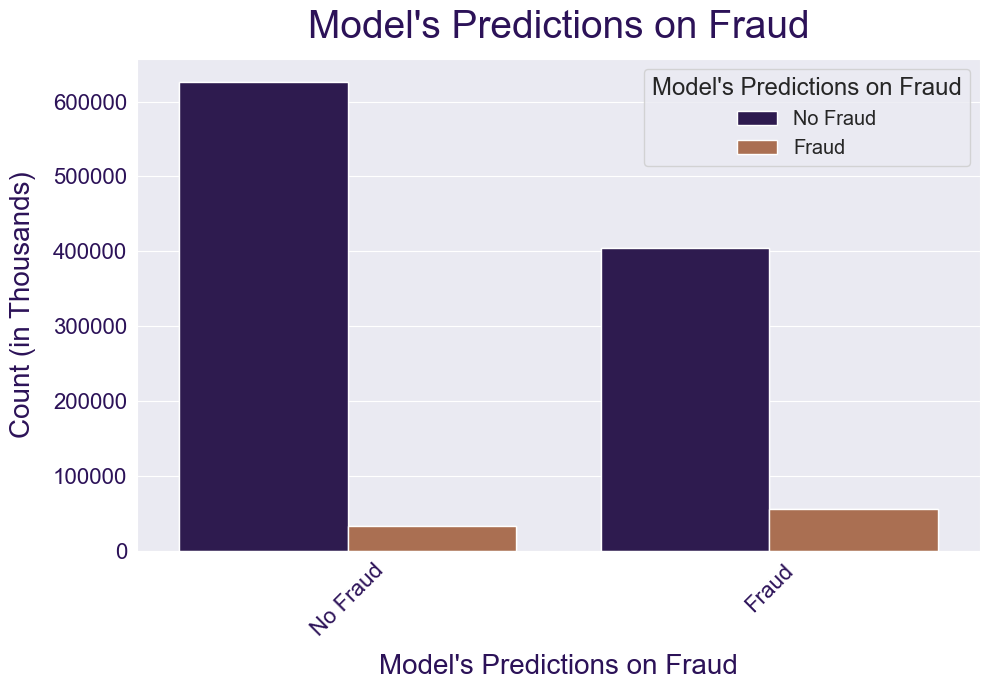

In [201]:
# plot countplot of target distribution by counter category

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(ax = ax, data= df_test_ml_models, x='fraud_pred_ee', hue='target', color=customPalette)

sns.countplot(ax = ax, data = df_test_ml_models, x='fraud_pred_ee', hue='target', color=customPalette)


plt.xticks([0, 1], ['No Fraud','Fraud'], rotation=45)
plt.legend(
    title="Model's Predictions on Fraud",
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel("Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=10);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);
plt.title("Model's Predictions on Fraud", fontsize=28, color='#2c1258', pad=15)
plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)
plt.show();






In [ ]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(ax = ax, data= df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette)
#plt.yticks([0, 1], ['No Fraud','Fraud'], rotation=45)
plt.text(-50, 1.38, 'No Fraud', {'font': 'Serif','weight':'bold',
                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


sns.countplot(ax = ax,  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette)

plt.yticks([ ])

plt.legend(
    title="Model's Predictions on Fraud",
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')

plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);

plt.title("Machine Learning (Easy Ensemble) Model's  Fraud Detection", fontsize=50, color='#2c1258', pad=45)

plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)
plt.show();

In [215]:
len(y_baseline_idx_test)


1119173

In [ ]:
labels = ['No Fraud','Fraud']

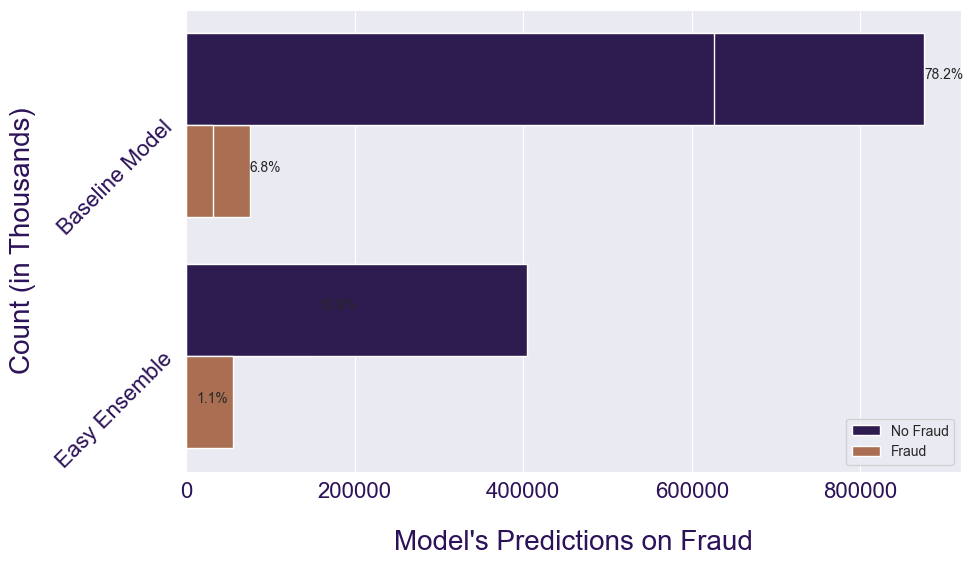

In [10]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette)
#ax.set_yticks([0, 1], ['No Fraud','Fraud'], rotation=45)
#plt.text(-50, 1.38, 'No Fraud', {'font': 'Serif','weight':'bold',
#                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


#sns.countplot(ax = ax,  data = df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette)
sns.countplot(ax = ax,  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette)

plt.yticks([ ])

# plt.legend(
#     title="Model's Predictions on Fraud",
#     labels = ['No Fraud','Fraud'],
#     fontsize='x-large',
#     title_fontsize='xx-large')

#plt.legend([],[])

plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);

#plt.title("Machine Learning Baseline Model's  Fraud Detection", fontsize=50, color='#2c1258', pad=45)
#plt.title("Baseline Model", fontsize=25, color='#2c1258', pad=15)
#plt.title("Model Comparison : ", fontsize=25, color='#2c1258', pad=15)
ax.set_yticks([0, 1], ['Baseline Model','Easy Ensemble'], rotation=45)

plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

#plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


In [144]:


df_false_pred = df_test_ml_models.query('target != fraud_pred_ee')

df_false_pred

,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ.2,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.085366,0.763572,0.236428,True,0,1,1,0.499381,0.500619,False
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135038,0.559889,0.440111,True,0,1,1,0.496718,0.503282,False
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.132029,0.862402,0.137598,True,0,1,1,0.498331,0.501669,False
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054674,0.667667,0.332333,True,1,0,1,0.499155,0.500845,False
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.175089,0.418888,0.581112,True,0,1,1,0.495342,0.504658,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119162,0.833333,0.784398,0.191781,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122615,0.064347,0.935653,True,1,0,1,0.499425,0.500575,False
1119164,0.333333,0.784391,0.109589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088079,0.837502,0.162498,True,0,1,1,0.499688,0.500312,False
1119166,0.452381,0.784409,0.089041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.060591,0.921517,0.078483,True,1,0,1,0.499884,0.500116,False
1119168,0.261905,0.784433,0.134703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076178,0.763758,0.236242,True,0,1,1,0.499954,0.500046,False


In [ ]:
eens_group =  df_test_ml_models.groupby('target')['fraud_pred_ee'].value_counts()
eens_group

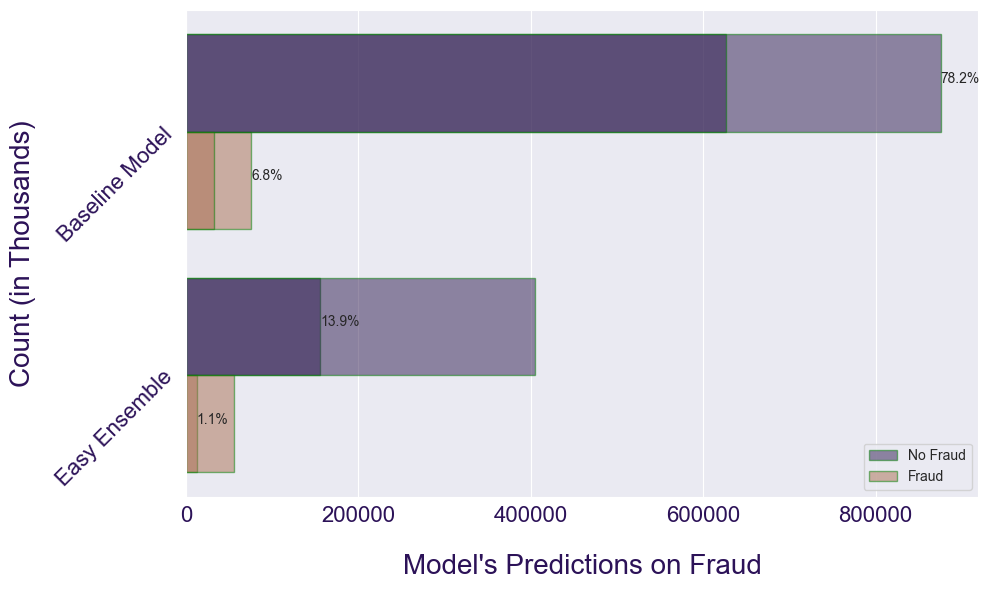

In [259]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.5)
#ax.set_yticks([0, 1], ['No Fraud','Fraud'], rotation=45)
#plt.text(-50, 1.38, 'No Fraud', {'font': 'Serif','weight':'bold',
#                                    'size': '16','style':'normal', 'color':'black'}, alpha = 0.7)

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


#sns.countplot(ax = ax,  data = df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette)
#sns.countplot(ax = ax,  data = df_test_ml_models, y='fraud_pred_ee', hue='target',  color='#f0e6fa', edgecolor='green', linewidth=1, alpha=0.7)

sns.countplot(ax = ax,  data = df_test_ml_models, y='fraud_pred_ee', hue='target',  color=customPalette, edgecolor='green', linewidth=1, alpha=0.5)

plt.yticks([ ])

# plt.legend(
#     title="Model's Predictions on Fraud",
#     labels = ['No Fraud','Fraud'],
#     fontsize='x-large',
#     title_fontsize='xx-large')
Predicted \n
#plt.legend([],[])

#ax.set_title('Correctly Detected Fraud and Non-Fraud', fontsize=28, color='#2c1258')
plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);

#plt.title("Machine Learning Baseline Model's  Fraud Detection", fontsize=50, color='#2c1258', pad=45)
#plt.title("Baseline Model", fontsize=25, color='#2c1258', pad=15)
#plt.title("Model Comparison : ", fontsize=25, color='#2c1258', pad=15)
ax.set_yticks([0, 1], ['Baseline Model','Easy Ensemble'], rotation=45)

plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


In [145]:

df_false_pred['fraud_pred_ee']


0          1
1          1
2          1
3          1
4          1
          ..
1119162    1
1119164    1
1119166    1
1119168    1
1119172    1
Name: fraud_pred_ee, Length: 437158, dtype: int64

In [157]:
y_baseline_idx_test


[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [166]:
y_true_vals = []

for i in y_test.values.tolist():
    y_true_vals.append(*i)

In [167]:
y_true_vals

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


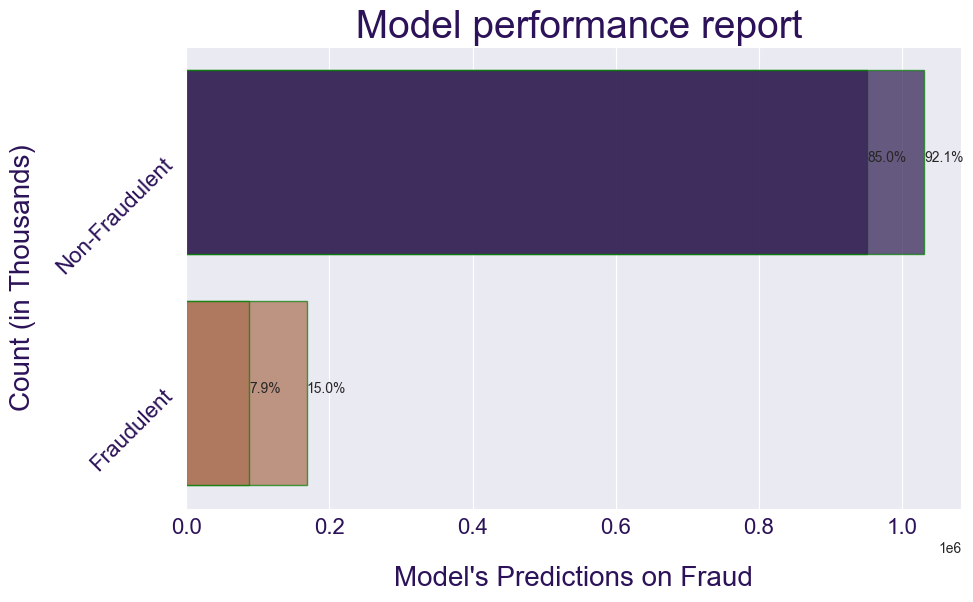

In [178]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_baseline_idx_test,  color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)

#sns.countplot(ax = ax, data= df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)
sns.countplot(ax = ax, data= df_test_ml_models, y=y_true_vals, color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


#sns.countplot(ax = ax,  data = df_false_pred, y=df_false_pred['fraud_pred_ee'], hue='target',  color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)

#sns.countplot(ax = ax,  data = df_false_pred, y=df_false_pred['fraud_pred_ee'], hue='target',  color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)

plt.yticks([ ])



ax.set_title(' Model performance report', fontsize=28, color='#2c1258')
plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);


ax.set_yticks([0, 1], ['Non-Fraudulent','Fraudulent'], rotation=45)

#plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

#plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


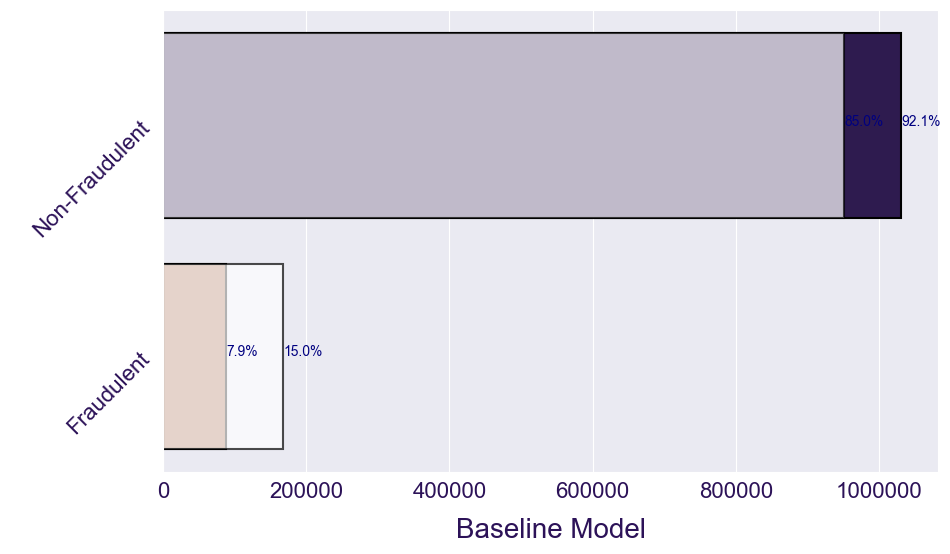

In [231]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_true_vals, color=customPalette, edgecolor='k', linewidth=1.5)

sns.countplot(ax = ax, data= df_test_ml_models, y=y_baseline_idx_test,  color='w', edgecolor='k', linewidth=1.5, alpha=0.7)

#sns.countplot(ax = ax, data= df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), color='navy')


ax.set_xticks(ticks=np.arange(0, 1119173, 200000))
ax.set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

#ax.set_title(' Easy Ensemble Model', fontsize=28, color='#2c1258')
#plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
#plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);


ax.set_yticks([0, 1], ['Non-Fraudulent','Fraudulent'], rotation=45)

ax.set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax.set_ylabel(' ');

#plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

#plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


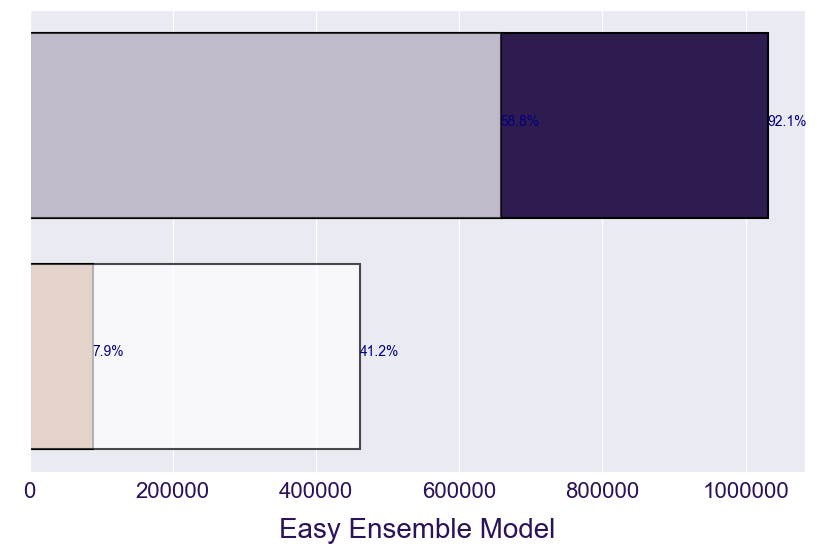

In [230]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_true_vals, color=customPalette,  edgecolor='k', linewidth=1.5)#, alpha=0.7)

sns.countplot(ax = ax, data= df_test_ml_models, y='fraud_pred_ee', color='w',  edgecolor='k', linewidth=1.5, alpha=0.7)

#sns.countplot(ax = ax, data= df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.7)


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), color='navy')


ax.set_xticks(ticks=np.arange(0, 1119173, 200000))
ax.set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

#ax.set_title(' Easy Ensemble Model', fontsize=28, color='#2c1258')
#plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
#plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);

ax.set_yticks([], [], rotation=45)

#ax.set_yticks([0, 1], ['Non-Fraudulent','Fraudulent'], rotation=45)

ax.set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax.set_ylabel(' ');

#plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

#plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


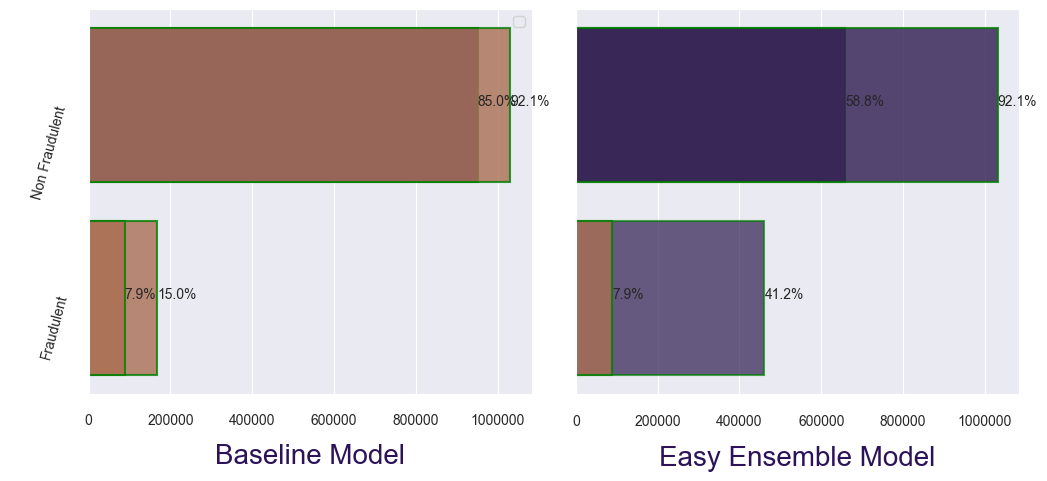

In [204]:





n_count = len(df_test_ml_models)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
#plt.subplots_adjust(wspace= 0.3, hspace= 0.4)
plt.subplots_adjust(wspace=0.1, hspace= 0.4)
#fig.tight_layout()



#fig.suptitle(" Prediction Performance ", fontsize='15', color='#2c1258')


#'#2c1258'

#'#b86a44'



sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test,  color= customPalette, edgecolor='green', linewidth=1.5, alpha=0.8)
sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_true_vals, color='#b86a44', edgecolor='green', linewidth=1.5, alpha=0.8)


ax[0].set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax[0].set_ylabel(' ');


ax[0].tick_params(color='#2c1258', size=10)

for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y))


ax[0].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[0].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

ax[0].set_yticklabels(labels=[' Non Fraudulent ', 'Fraudulent'], rotation=75)

# ax[0].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(2.30, -0.1),loc='best', borderaxespad=0.)

ax[0].legend([ ])


sns.countplot(ax = ax[1], data= df_test_ml_models, y='fraud_pred_ee',  color='#2c1258', edgecolor='green', linewidth=1.5, alpha=0.7)
sns.countplot(ax = ax[1], data= df_test_ml_models, y=y_true_vals, color=customPalette, edgecolor='green', linewidth=1.5, alpha=0.8)


for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y))


ax[1].set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax[1].set_ylabel(' ');

ax[1].tick_params(color='#2c1258', size=11)

ax[1].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[1].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

#ax[1].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)
ax[1].set_yticklabels([' ', ' '])

#plt.xticks(color='#2c1258',fontsize=12)
#plt.yticks(color='#2c1258', fontsize=12)

#ax[1].legend([ ])

# ax[1].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(-0.602, 1.02, 1., .102), loc='lower left',
#                 ncols=2, mode="expand", borderaxespad=0.)

# ax[1].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(1.30, -0.1),loc='upper left', borderaxespad=0.)


#plt.savefig("plots/model_base_correct_pred_vs_true.jpg");
plt.show();






In [260]:
y_test.shape

(1119173, 1)

In [262]:
len(y_baseline_idx_test)

1119173

In [268]:

df_test_ml_models.head()



,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.085366,0.763572,0.236428,True,0,1,1,0.499381,0.500619,False
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135038,0.559889,0.440111,True,0,1,1,0.496718,0.503282,False
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.132029,0.862402,0.137598,True,0,1,1,0.498331,0.501669,False
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054674,0.667667,0.332333,True,1,0,1,0.499155,0.500845,False
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.175089,0.418888,0.581112,True,0,1,1,0.495342,0.504658,False


In [12]:
#df_test_ml_models = df_predictions.query('pred_corr == True')

y_test_pred_correct = df_test_ml_models.query('pred_corr_ee == True')

y_test_pred_correct



,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ.2,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
5,0.023810,0.784405,0.075342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056938,0.982295,0.017705,True,0,1,0,0.500782,0.499218,True
6,0.333333,0.784415,0.180365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043807,0.510535,0.489465,True,0,1,0,0.503207,0.496793,True
8,0.500000,0.784415,0.162100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047435,0.542108,0.457892,True,0,1,0,0.502280,0.497720,True
9,0.000000,0.784468,0.054795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072186,0.989780,0.010220,True,1,0,0,0.501935,0.498065,True
10,0.738095,0.784491,0.084475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050692,0.900473,0.099527,True,1,0,0,0.502703,0.497297,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119165,0.071429,0.784401,0.027397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052219,0.996292,0.003708,True,1,0,0,0.505064,0.494936,True
1119167,0.142857,0.784399,0.132420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.069209,0.832640,0.167360,True,0,1,0,0.501080,0.498920,True
1119169,0.119048,0.784750,0.148402,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.133421,0.682668,0.317332,False,1,0,1,0.494474,0.505526,True
1119170,0.261905,0.784763,0.082192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038195,0.982123,0.017877,True,1,0,0,0.501071,0.498929,True


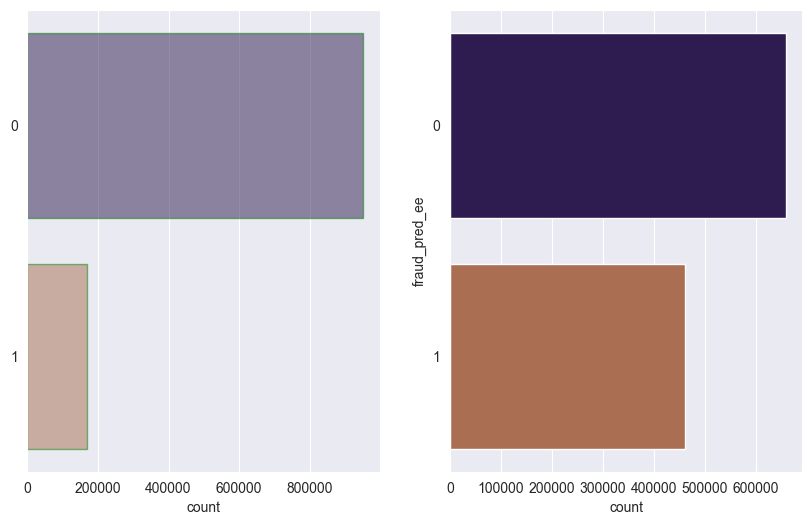

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test, color=customPalette, edgecolor='green', linewidth=1, alpha=0.5)

sns.countplot(ax = ax[1],  data = df_test_ml_models, y='fraud_pred_ee', color=customPalette)


plt.show();

In [16]:
y_test_pred_correct0 = df_test_ml_models.query('pred_corr_ee == True')

y_test_pred_correct0

,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ.2,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
5,0.023810,0.784405,0.075342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056938,0.982295,0.017705,True,0,1,0,0.500782,0.499218,True
6,0.333333,0.784415,0.180365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043807,0.510535,0.489465,True,0,1,0,0.503207,0.496793,True
8,0.500000,0.784415,0.162100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047435,0.542108,0.457892,True,0,1,0,0.502280,0.497720,True
9,0.000000,0.784468,0.054795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072186,0.989780,0.010220,True,1,0,0,0.501935,0.498065,True
10,0.738095,0.784491,0.084475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050692,0.900473,0.099527,True,1,0,0,0.502703,0.497297,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119165,0.071429,0.784401,0.027397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052219,0.996292,0.003708,True,1,0,0,0.505064,0.494936,True
1119167,0.142857,0.784399,0.132420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.069209,0.832640,0.167360,True,0,1,0,0.501080,0.498920,True
1119169,0.119048,0.784750,0.148402,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.133421,0.682668,0.317332,False,1,0,1,0.494474,0.505526,True
1119170,0.261905,0.784763,0.082192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038195,0.982123,0.017877,True,1,0,0,0.501071,0.498929,True


In [ ]:
df_test_ml_models.query('member_years'

In [17]:
y_test_pred_correct1 = df_test_ml_models.query('member_years > 0.5 and pred_corr_ee == True')

y_test_pred_correct1.head()

,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr_lr,counter_type_ELEC,counter_type_GAZ.2,fraud_pred_ee,no_fraud_proba_ee,fraud_proba_ee,pred_corr_ee
10,0.738095,0.784491,0.084475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050692,0.900473,0.099527,True,1,0,0,0.502703,0.497297,True
23,0.595238,0.784596,0.086758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069231,0.904488,0.095512,True,1,0,0,0.500170,0.499830,True
63,0.714286,0.784474,0.187215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062032,0.196258,0.803742,True,1,0,0,0.502538,0.497462,True
71,0.642857,0.784452,0.150685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050295,0.545773,0.454227,True,1,0,0,0.502327,0.497673,True
78,0.904762,0.784414,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066247,0.402044,0.597956,True,0,1,0,0.501313,0.498687,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119140,0.833333,0.784399,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067032,0.236784,0.763216,True,0,1,0,0.501923,0.498077,True
1119144,0.833333,0.784489,0.152968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064816,0.358569,0.641431,True,1,0,0,0.502249,0.497751,True
1119155,0.523810,0.784391,0.157534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056397,0.514131,0.485869,True,0,1,0,0.501320,0.498680,True
1119158,0.523810,0.784562,0.082192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056628,0.940041,0.059959,True,1,0,0,0.501132,0.498868,True


In [ ]:
eepredicts_group =  df_test_ml_models.groupby('target')[[ 'fraud_pred_ee']].value_counts()

eepredicts_group

In [47]:
a = df_test_ml_models.query('pred_corr_ee == True')

eepredicts_group =  df_test_ml_models.groupby('target')[[ 'fraud_pred_ee']].value_counts()

eepredicts_group

target  fraud_pred_ee
0       0                625964
        1                404932
1       1                 56051
        0                 32226
Name: count, dtype: int64

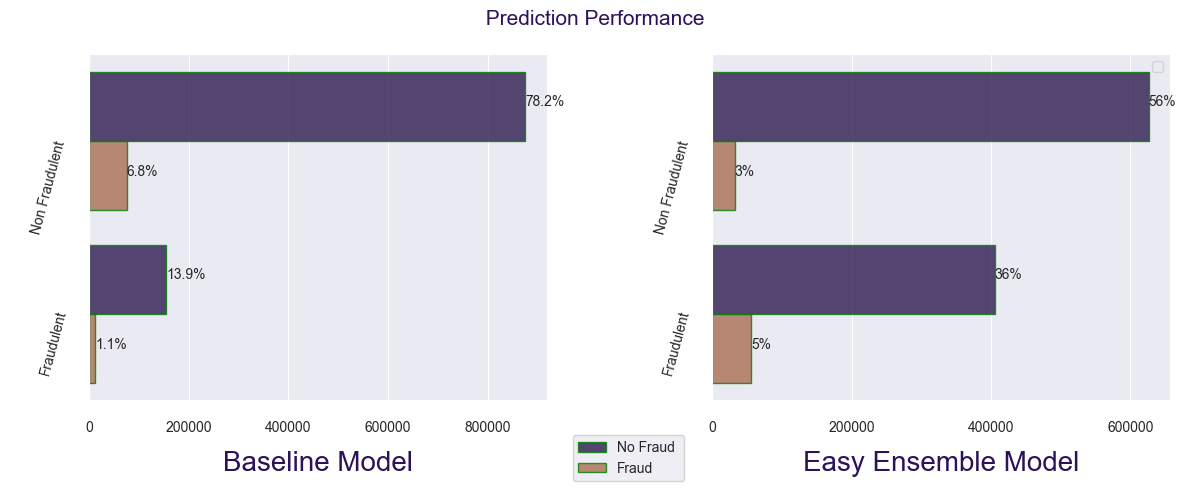

In [175]:

n_count = len(df_test_ml_models)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace= 0.3, hspace= 0.3)



fig.suptitle(" Prediction Performance ", fontsize='15', color='#2c1258')


sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


ax[0].set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax[0].set_ylabel(' ');

#plt.xticks(color='#2c1258',fontsize=11)
#plt.yticks(color='#2c1258', fontsize=11)

#ax[0].xaxis.label.set_color('#2c1258')
#ax[0].yaxis.label.set_color('#2c1258')

ax[0].tick_params(color='#2c1258', size=11)

for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * (p.get_width()/n_count))
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y))


ax[0].set_xticks(ticks=np.arange(0, 819173, 200000))
ax[0].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000])#, rotation=90)

ax[0].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)

ax[0].legend(labels = ['No Fraud ','Fraud'], bbox_to_anchor=(1.30, -0.1),
                        loc='best', borderaxespad=0.)


fig.tight_layout()

sns.countplot(ax = ax[1],  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


for p in ax[1].patches:
        percentage = '{:.0f}%'.format(100 * (p.get_width()/n_count))
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y))


ax[1].set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax[1].set_ylabel(' ');

ax[1].tick_params(color='#2c1258', size=11)

ax[1].set_xticks(ticks=np.arange(0, 619173, 200000))
ax[1].set_xticklabels(labels=[0,  200000,  400000,  600000])#, rotation=90)

ax[1].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)

#plt.xticks(color='#2c1258',fontsize=12)
#plt.yticks(color='#2c1258', fontsize=12)

ax[1].legend([ ])





plt.savefig("plots/model_base_correct_pred_vs_true.jpg");
plt.show();

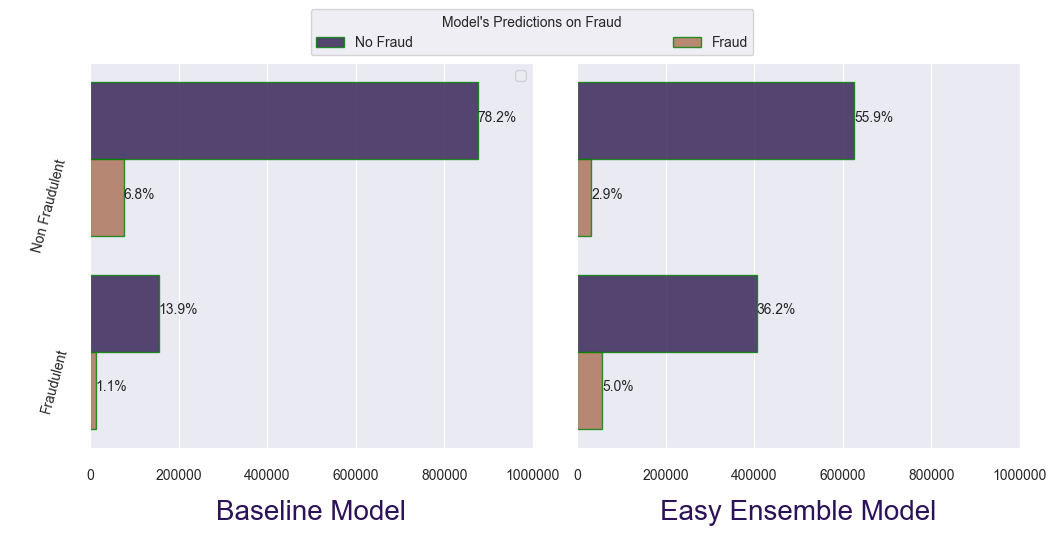

In [234]:

n_count = len(df_test_ml_models)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
#plt.subplots_adjust(wspace= 0.3, hspace= 0.4)
plt.subplots_adjust(wspace=0.1, hspace= 0.4)
#fig.tight_layout()



#fig.suptitle(" Prediction Performance ", fontsize='15', color='#2c1258')


sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


ax[0].set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax[0].set_ylabel(' ');


ax[0].tick_params(color='#2c1258', size=11)

for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y))

# for p in ax[0].patches:
#         percentage =  int(p.get_width())
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax[0].annotate(percentage, (x, y))

ax[0].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[0].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

ax[0].set_yticklabels(labels=[' Non Fraudulent ', 'Fraudulent'], rotation=75)

# ax[0].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(2.30, -0.1),loc='best', borderaxespad=0.)

ax[0].legend([ ])


sns.countplot(ax = ax[1],  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y))


# for p in ax[1].patches:
#         percentage =  int(p.get_width())
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax[1].annotate(percentage, (x, y))


ax[1].set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax[1].set_ylabel(' ');

ax[1].tick_params(color='#2c1258', size=11)

ax[1].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[1].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

#ax[1].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)
ax[1].set_yticklabels([' ', ' '])

#plt.xticks(color='#2c1258',fontsize=12)
#plt.yticks(color='#2c1258', fontsize=12)

#ax[1].legend([ ])

ax[1].legend(title= "Model's Predictions on Fraud",
                labels = ['No Fraud ','Fraud'],
                bbox_to_anchor=(-0.602, 1.02, 1., .102), loc='lower left',
                ncols=2, mode="expand", borderaxespad=0.)

# ax[1].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(1.30, -0.1),loc='upper left', borderaxespad=0.)


#plt.savefig("plots/model_base_correct_pred_vs_true.jpg");
plt.show();

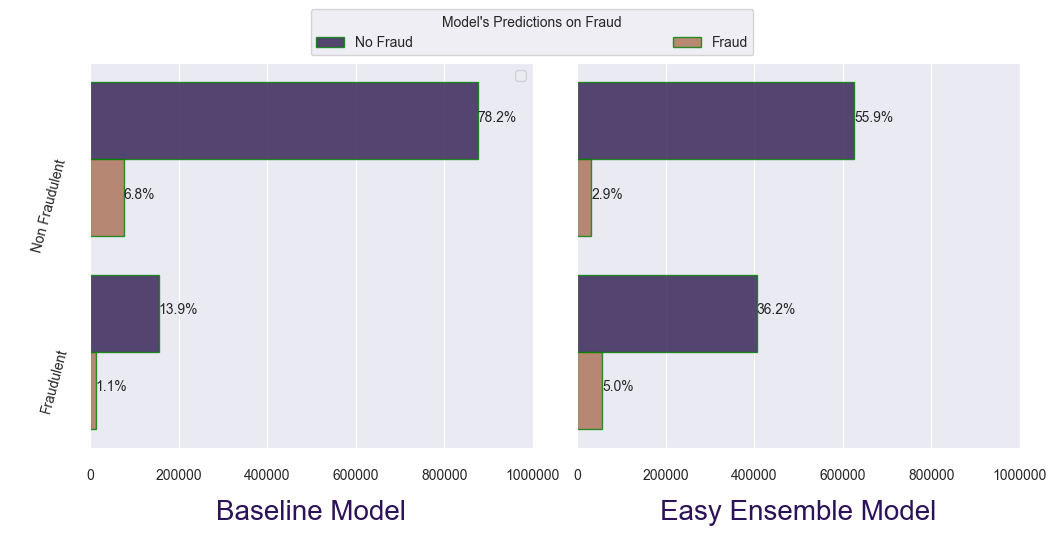

In [ ]:

n_count = len(df_test_ml_models)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
#plt.subplots_adjust(wspace= 0.3, hspace= 0.4)
plt.subplots_adjust(wspace=0.1, hspace= 0.4)
#fig.tight_layout()



#fig.suptitle(" Prediction Performance ", fontsize='15', color='#2c1258')


sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


ax[0].set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax[0].set_ylabel(' ');


ax[0].tick_params(color='#2c1258', size=11)

for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y))


ax[0].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[0].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

ax[0].set_yticklabels(labels=[' Non Fraudulent ', 'Fraudulent'], rotation=75)

# ax[0].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(2.30, -0.1),loc='best', borderaxespad=0.)

ax[0].legend([ ])


sns.countplot(ax = ax[1],  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y))


ax[1].set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax[1].set_ylabel(' ');

ax[1].tick_params(color='#2c1258', size=11)

ax[1].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[1].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])

#ax[1].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)
ax[1].set_yticklabels([' ', ' '])

#plt.xticks(color='#2c1258',fontsize=12)
#plt.yticks(color='#2c1258', fontsize=12)

#ax[1].legend([ ])

ax[1].legend(title= "Model's Predictions on Fraud",
                labels = ['No Fraud ','Fraud'],
                bbox_to_anchor=(-0.602, 1.02, 1., .102), loc='lower left',
                ncols=2, mode="expand", borderaxespad=0.)

# ax[1].legend(title= "Model's Predictions on Fraud",
#                 labels = ['No Fraud ','Fraud'],
#                 bbox_to_anchor=(1.30, -0.1),loc='upper left', borderaxespad=0.)


#plt.savefig("plots/model_base_correct_pred_vs_true.jpg");
plt.show();

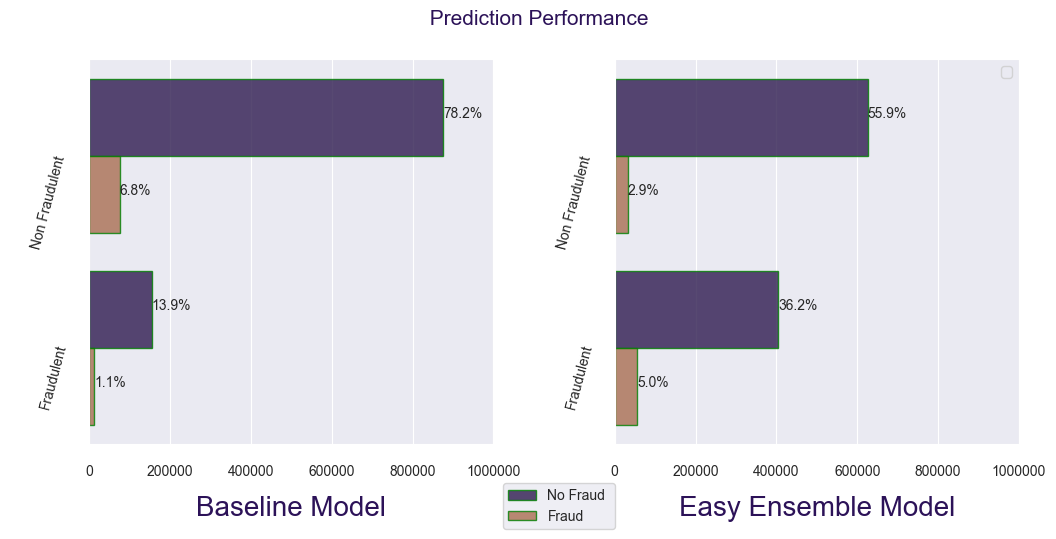

In [ ]:

n_count = len(df_test_ml_models)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace= 0.3, hspace= 0.3)



fig.suptitle(" Prediction Performance ", fontsize='15', color='#2c1258')


sns.countplot(ax = ax[0], data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


ax[0].set_xlabel('Baseline Model', fontsize=20, color='#2c1258', labelpad=12);
ax[0].set_ylabel(' ');

#plt.xticks(color='#2c1258',fontsize=11)
#plt.yticks(color='#2c1258', fontsize=11)

#ax[0].xaxis.label.set_color('#2c1258')
#ax[0].yaxis.label.set_color('#2c1258')

ax[0].tick_params(color='#2c1258', size=11)

for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y))


ax[0].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[0].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])#, rotation=90)

ax[0].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)

ax[0].legend(labels = ['No Fraud ','Fraud'], bbox_to_anchor=(1.30, -0.1),
                        loc='best', borderaxespad=0.)


fig.tight_layout()

sns.countplot(ax = ax[1],  data = df_test_ml_models, y='fraud_pred_ee', hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.8)


for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y))


ax[1].set_xlabel('Easy Ensemble Model', fontsize=20, color='#2c1258', labelpad=12);
ax[1].set_ylabel(' ');

ax[1].tick_params(color='#2c1258', size=11)

ax[1].set_xticks(ticks=np.arange(0, 1119173, 200000))
ax[1].set_xticklabels(labels=[0,  200000,  400000,  600000,  800000, 1000000])#, rotation=90)

ax[1].set_yticklabels(labels=['Non Fraudulent ', 'Fraudulent'], rotation=75)

#plt.xticks(color='#2c1258',fontsize=12)
#plt.yticks(color='#2c1258', fontsize=12)

ax[1].legend([ ])





plt.savefig("plots/model_base_correct_pred_vs_true.jpg");
plt.show();

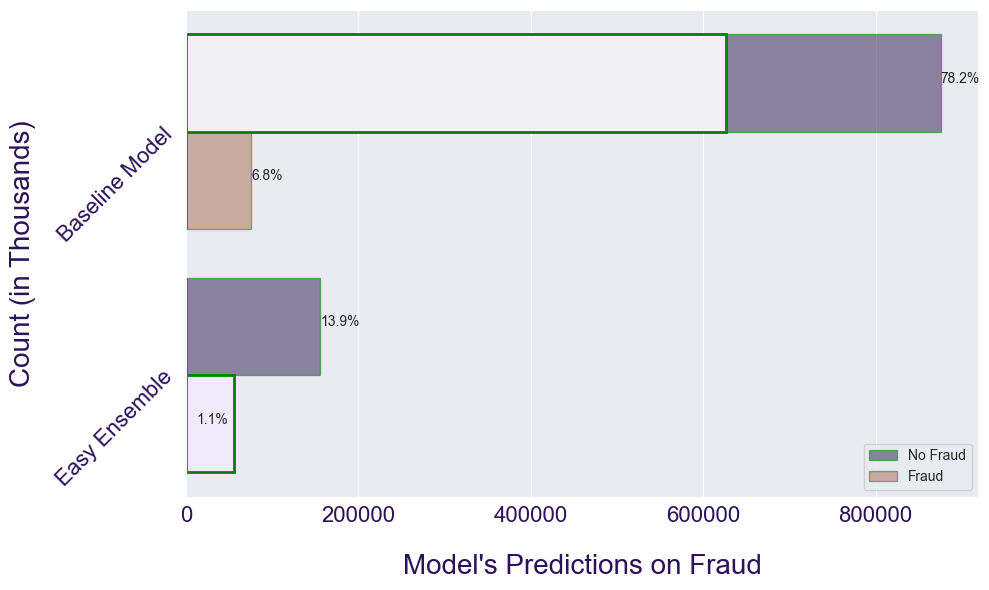

In [ ]:
# plot countplot of target distribution by counter category

n_count = len(df_test_ml_models)

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(ax = ax, data= df_test_ml_models, y=y_baseline_idx_test, hue='target', color=customPalette, edgecolor='green', linewidth=1, alpha=0.5)

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/n_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


sns.countplot(ax = ax,  data = df_test_ml_models, y=y_test_pred_correct['target'], hue='target',  color='#f0e6fa', edgecolor='green', linewidth=2)

plt.yticks([ ])


#ax.set_title('Correctly Detected Fraud and Non-Fraud', fontsize=28, color='#2c1258')
plt.xlabel( "Model's Predictions on Fraud", fontsize=20, color='#2c1258', labelpad=20);
plt.ylabel('Count (in Thousands)', fontsize=20, color='#2c1258', labelpad=12);

ax.set_yticks([0, 1], ['Baseline Model','Easy Ensemble'], rotation=45)

plt.legend(labels = ['No Fraud','Fraud'])


plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)

plt.savefig("plots/model_comparison_base_easy.jpg");
plt.show();


In [54]:
# model characteristics: report, key performance index and insights

labels = ['Fraudulent', 'Non Fraudulent']

model_names = ['baseline', 'logitic regression', 'easy ensemble']

model_report_names = ['support', 'precision', 'recall', 'f1_score']

model_kpis = [ 'roc_auc', 'fbeta_score2', 'accuracy', 'true positive', 'false positive', 'false negative', 'true negative']



model_report_base_0 = [1030896,  0.92, 0.88,  0.90]
model_report_base_1 = [88277,  0.08, 0.12,  0.09]
model_report_base_ = [model_report_base_0, model_report_base_1]
model_char_base_ = [0.4993,  0.1055, 0.8223,  910059, 120837, 78060, 10217]


model_report_lr_0 = [1030896,  0.93, 0.76,  0.84]
model_report_lr_1 = [88277,  0.11, 0.36,  0.17]
model_report_lr_ = [model_report_lr_0, model_report_lr_1]
model_char_lr_ = [0.5608,  0.2518, 0.7303,  785650, 245246, 56546, 31731]


model_report_eens_0 = [1030896,  0.95, 0.61,  0.74]
model_report_eens_1 = [88277,  0.12, 0.63,  0.20]
model_report_eens_ = [model_report_eens_0, model_report_eens_1]
model_char_eens_ = [None,  0.344, 0.6093,  625964, 404932, 32226, 56051]



ml_reportidx = pd.MultiIndex.from_product([model_names,
                                labels],
                                names=['Models', 'Target'])




In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=ml_characteristics, x=ml_characteristics.index,  color=customPalette)
ax.set_xlabel('Models')
ax.set_ylabel('Metrics', color='g')
plt.show()

In [58]:

reports_0 = {
            'Baseline' : model_report_base_0,
            'Logistic Regression' : model_report_lr_0,
            'Easy Ensemble' : model_report_eens_0
    }

df_report_0 = pd.DataFrame(reports_0).T

df_report_0.columns = model_report_names
df_report_0


,support,precision,recall,f1_score
Baseline,1030896.0,0.92,0.88,0.90
Logistic Regression,1030896.0,0.93,0.76,0.84
Easy Ensemble,1030896.0,0.95,0.61,0.74


In [64]:

df_reports_0 = df_report_0.stack().reset_index()
df_reports_0.columns = ['Model', 'Metric', 'Values']
df_reports_0


,Model,Metric,Values
0,Baseline,support,1030896.00
1,Baseline,precision,0.92
2,Baseline,recall,0.88
3,Baseline,f1_score,0.90
4,Logistic Regression,support,1030896.00
5,Logistic Regression,precision,0.93
6,Logistic Regression,recall,0.76
7,Logistic Regression,f1_score,0.84
8,Easy Ensemble,support,1030896.00
9,Easy Ensemble,precision,0.95


In [65]:

#df_reports_0 = df_report_0.melt(df_report_0.reset_index(), id_vars='Models', var_name="Models for Decision Making", value_name = "Model KPI's On Fraudulent Activities")

#df_reports_0

In [ ]:


# Array for horizontal bar's position
#ind = np.array([0, 1, 2])
ind = np.array([0, 1, 2])

# Bar's width
width = 0.4

fig, ax = plt.subplots()

# Horizontal bar plot
ax.barh(ind, np.array([4, 3, 5]), width, color=customPalette, label='N')
ax.barh(ind + width, np.array([2, 5, 2]), width, color=customPalette, label='M')

# Set Y-axis ticks and ticklabels
ax.set(yticks=ind + width, yticklabels=np.array(['A', 'B', 'C']),
ylim=[2*width - 1, len(ind)])

# Legend at the upper right corner
ax.legend(loc='upper right')

# Display the plot
plt.show()


In [60]:

reports_1 = {
            'Baseline' : model_report_base_1,
            'Logistic Regression' : model_report_lr_1,
            'Easy Ensemble' : model_report_eens_1
    }

df_report_1 = pd.DataFrame(reports_1).T

df_report_1.columns = model_report_names
df_report_1


,support,precision,recall,f1_score
Baseline,88277.0,0.08,0.12,0.09
Logistic Regression,88277.0,0.11,0.36,0.17
Easy Ensemble,88277.0,0.12,0.63,0.20


In [66]:

#df_reports_1 = df_report_1.melt(var_name="Models for Decision Making", value_name = "Model KPI's On Fraudulent Activities")

#df_reports_1

df_reports_1 = df_report_1.stack().reset_index()
df_reports_1.columns = ['Model', 'Metric', 'Values']
df_reports_1

,Model,Metric,Values
0,Baseline,support,88277.00
1,Baseline,precision,0.08
2,Baseline,recall,0.12
3,Baseline,f1_score,0.09
4,Logistic Regression,support,88277.00
5,Logistic Regression,precision,0.11
6,Logistic Regression,recall,0.36
7,Logistic Regression,f1_score,0.17
8,Easy Ensemble,support,88277.00
9,Easy Ensemble,precision,0.12


In [46]:

ml_char_all = [ model_char_base_, model_char_lr_, model_char_eens_]

ml_characteristics = pd.DataFrame(ml_char_all, index=model_names, columns=model_kpis)

ml_characteristics

,roc_auc,fbeta_score2,accuracy,true positive,false positive,false negative,true negative
baseline,0.4993,0.1055,0.8223,910059,120837,78060,10217
logitic regression,0.5608,0.2518,0.7303,785650,245246,56546,31731
easy ensemble,NaN,0.3440,0.6093,625964,404932,32226,56051


In [47]:


ml_kpis = pd.DataFrame(ml_char_all, index=model_names, columns=model_kpis).T
ml_kpis


,baseline,logitic regression,easy ensemble
roc_auc,0.4993,0.5608,NaN
fbeta_score2,0.1055,0.2518,0.3440
accuracy,0.8223,0.7303,0.6093
true positive,910059.0000,785650.0000,625964.0000
false positive,120837.0000,245246.0000,404932.0000
false negative,78060.0000,56546.0000,32226.0000
true negative,10217.0000,31731.0000,56051.0000


In [ ]:
# plot countplot of model characteristics


fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=ml_kpis, x=[['baseline', 'logistic regression', 'easy ensemble']], color=customPalette)

plt.xticks(rotation=45)
plt.legend(
    title='Fraudulent Counter Manipulation',
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel(' ');
plt.ylabel('Count (in Million)', fontsize=20, color='#2c1258');
plt.title('Fraudulent Manipulation by Counter Type', fontsize=28, color='#2c1258')
plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)
#plt.savefig('plots/target_distribution.jpg')
plt.show();

In [51]:


# fig, ax = plt.subplots(figsize=(20, 10))
# sns.countplot(data=ml_characteristics, x=ml_characteristics.index,  color=customPalette)
# ax.set_xlabel('Models')
# ax.set_ylabel('Metrics', color='g')
# plt.show()

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

#fraud_transactions = ml_characteristics.Time[data.Class == 1]
#normal_transactions = ml_characteristics.Time[data.Class == 0]

ax1.hist(fraud_transactions, bins = 50, color=customPalette, edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='deepskyblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()
